#### import required libraries

In [ ]:
# load required libraries
%tensorflow_version 1.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

TensorFlow 1.x selected.


In [ ]:
tf.__version__

'1.15.2'

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential,Model,Input
from keras.layers import Dense,Activation,Dropout,Flatten,Convolution2D,MaxPooling2D,Conv2D,MaxPool2D

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/drive')
import os
os.chdir('/drive/My Drive/deep_learning')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


#### Read dataset - available information on the traffic sign images

In [ ]:
# load the dataset
#import io
df = pd.read_csv('GSTRB.csv')

In [ ]:
# check the list of variables and few images data. in this example, variables names
# are masked and termed as 1, 2, 3, etc.
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,Labels
0,0,78,76,87,101,127,127,136,165,247,248,243,206,138,141,177,219,245,236,202,152,95,93,108,95,79,73,69,68,84,81,90,123,144,97,125,212,254,254,236,...,129,165,129,99,92,79,72,89,100,111,102,85,98,69,68,68,82,93,86,84,95,93,80,75,107,149,111,92,129,161,125,95,97,87,73,79,100,102,94,0
1,0,72,78,76,77,119,147,96,132,235,252,251,220,163,169,191,172,211,240,237,219,177,103,87,113,102,81,75,68,68,76,83,93,123,110,104,188,251,250,246,...,104,97,138,137,106,94,81,70,78,91,107,73,84,91,75,65,70,73,83,86,82,86,95,87,74,111,143,105,95,109,147,131,106,95,89,71,71,100,104,0
2,0,72,78,79,111,121,94,162,234,249,248,241,167,153,220,182,158,213,235,234,226,180,97,87,118,105,82,76,67,67,74,98,135,111,105,191,250,247,251,210,...,100,102,114,128,112,95,89,70,70,78,91,78,89,95,75,65,69,71,75,80,79,83,91,89,84,137,129,92,101,94,115,150,121,93,90,74,70,80,96,0
3,0,68,74,92,128,104,105,205,249,250,249,216,138,185,243,198,129,202,243,237,235,165,108,105,99,100,91,76,68,65,71,107,131,95,136,227,255,255,249,184,...,85,99,101,107,130,102,95,78,65,71,84,77,75,88,87,66,64,64,66,73,80,81,84,87,92,131,130,94,91,95,89,133,151,105,87,80,69,71,89,0
4,0,72,72,74,110,121,91,141,217,248,241,241,189,126,141,130,166,235,233,229,215,166,92,88,120,100,80,80,78,68,72,92,138,110,91,174,245,246,242,233,...,120,122,119,117,105,94,97,94,76,68,76,140,133,129,129,122,125,134,134,127,124,121,116,114,114,137,139,100,92,96,92,113,108,100,99,101,86,65,71,0


In [ ]:
# seperate the independant and the dependant variables 
x=df.drop('Labels',axis=1)
y=df.Labels

In [ ]:
# print first 5 rows to check the variables in the dataframe
x.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,78,76,87,101,127,127,136,165,247,248,243,206,138,141,177,219,245,236,202,152,95,93,108,95,79,73,69,68,84,81,90,123,144,97,125,212,254,254,236,...,97,129,165,129,99,92,79,72,89,100,111,102,85,98,69,68,68,82,93,86,84,95,93,80,75,107,149,111,92,129,161,125,95,97,87,73,79,100,102,94
1,0,72,78,76,77,119,147,96,132,235,252,251,220,163,169,191,172,211,240,237,219,177,103,87,113,102,81,75,68,68,76,83,93,123,110,104,188,251,250,246,...,108,104,97,138,137,106,94,81,70,78,91,107,73,84,91,75,65,70,73,83,86,82,86,95,87,74,111,143,105,95,109,147,131,106,95,89,71,71,100,104
2,0,72,78,79,111,121,94,162,234,249,248,241,167,153,220,182,158,213,235,234,226,180,97,87,118,105,82,76,67,67,74,98,135,111,105,191,250,247,251,210,...,90,100,102,114,128,112,95,89,70,70,78,91,78,89,95,75,65,69,71,75,80,79,83,91,89,84,137,129,92,101,94,115,150,121,93,90,74,70,80,96
3,0,68,74,92,128,104,105,205,249,250,249,216,138,185,243,198,129,202,243,237,235,165,108,105,99,100,91,76,68,65,71,107,131,95,136,227,255,255,249,184,...,87,85,99,101,107,130,102,95,78,65,71,84,77,75,88,87,66,64,64,66,73,80,81,84,87,92,131,130,94,91,95,89,133,151,105,87,80,69,71,89
4,0,72,72,74,110,121,91,141,217,248,241,241,189,126,141,130,166,235,233,229,215,166,92,88,120,100,80,80,78,68,72,92,138,110,91,174,245,246,242,233,...,114,120,122,119,117,105,94,97,94,76,68,76,140,133,129,129,122,125,134,134,127,124,121,116,114,114,137,139,100,92,96,92,113,108,100,99,101,86,65,71


In [ ]:
# Data preprocessing
x /=255 #normalizing the values
x.drop('Unnamed: 0',axis=1,inplace=True)  # drop unrequired columns
x=np.array(x)# change the datatype from pandas series to numpy array
x=x.reshape(x.shape[0],28,28,1)# reshape the image

In [ ]:
# split the data into train and test ,train is for model training and test data can be used to evaluate correctness / performance of the model
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.15,random_state=101)

## Visalizations on few images of traffic signs from the data

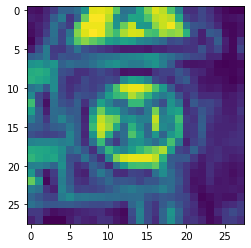

In [ ]:
plt.imshow(x[0].reshape(28,28));

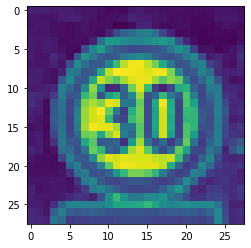

In [ ]:
plt.imshow(x[500].reshape(28,28));

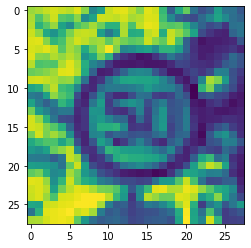

In [ ]:
plt.imshow(x[2500].reshape(28,28));

In [ ]:
# Convert 1-dimensional class arrays to 43-dimensional class matrices
y_tr = np_utils.to_categorical(y_tr, 43) # Converting the data into 0 and 1
y_te = np_utils.to_categorical(y_te, 43) # Converting the data into 0 and 1

## Build CNN model

# define the model architecture
model=Sequential()
      ############################Convolution network##################################
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(1,28,28),data_format='channels_first'))# convolution layer
      
model.add(Convolution2D(32,(3,3),activation='relu'))#convolutionlayer
model.add(MaxPooling2D(pool_size=(2,2)))# pooling layer
model.add(Dropout(0.2))#dropot to handle overfitting


model.add(Flatten())# image flattern to row matrix


      ############################Feedforward network################################

model.add(Dense(2048,activation='relu'))# input neurons
model.add(Dropout(0.5)) # dropout to handle overfitting


model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43,activation='softmax'))
  


In [ ]:
IMG_SIZE=28

In [ ]:
inputs = Input(shape = (IMG_SIZE, IMG_SIZE,1))
# input layer
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1))(inputs)
# convolution layer
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
#Maxpool layer
model = MaxPool2D(pool_size=(2, 2))(model)
#drop out to minimise overfitting
model = Dropout(rate=0.3)(model)
#flatten layer
model = Flatten()(model)
#ANN model
dense = Dense(2048, activation='relu')(model)
model = Dropout(rate=0.5)(dense)
dense = Dense(1024, activation='relu')(model)
model = Dropout(rate=0.5)(dense)
dense = Dense(512, activation='relu')(model)
model = Dropout(rate=0.5)(dense)

#dense = Dense(512, activation = "relu")(model)

head_root = Dense(43, activation = 'softmax')(model)

model = Model(inputs=inputs, outputs=head_root)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
# compile the model using loss fnction, categorical cross entropy, Adam optimizer and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',])

In [ ]:
# fit the model with train data
model.fit(x_tr,y_tr,batch_size=32,epochs=10,verbose=1)


Epoch 1/10
33327/33327 [==============================] - 18s 532us/step - loss: 1.3019 - accuracy: 0.6192
Epoch 2/10
33327/33327 [==============================] - 15s 446us/step - loss: 0.2682 - accuracy: 0.9187
Epoch 3/10
33327/33327 [==============================] - 15s 450us/step - loss: 0.1659 - accuracy: 0.9511
Epoch 4/10
33327/33327 [==============================] - 15s 448us/step - loss: 0.1292 - accuracy: 0.9618
Epoch 5/10
33327/33327 [==============================] - 15s 447us/step - loss: 0.1137 - accuracy: 0.9674
Epoch 6/10
33327/33327 [==============================] - 15s 444us/step - loss: 0.1046 - accuracy: 0.9713
Epoch 7/10
33327/33327 [==============================] - 15s 445us/step - loss: 0.0930 - accuracy: 0.9732
Epoch 8/10
33327/33327 [==============================] - 15s 445us/step - loss: 0.0894 - accuracy: 0.9764
Epoch 9/10
33327/33327 [==============================] - 15s 443us/step - loss: 0.0822 - accuracy: 0.9782
Epoch 10/10
33327/33327 [===========

In [ ]:
# model evaluation score[loss , accuracy]
model.evaluate(x_te,y_te, verbose=0)

[0.033847022279190654, 0.9914994835853577]

In [ ]:
im=Image.open(r'C:\Users\yvdha\projectt\Train'+'\\'+str(p)+'\\'+q)# read iamge using PIL.Image
im1 = im.resize((28,28),Image.ANTIALIAS)
im1.save('test.jpg',optimize=True,quality=95)# save image in new loaction

In [ ]:
import cv2

In [ ]:
img=cv2.imread('test.jpg')
plt.imshow(img)
y=model.predict(img.reshape(1,28,28,1))
print(ourtput[y.argmax()])

In [ ]:
import pickle

In [ ]:
with open('model.pkl','wb') as file:
  pickle.dump(model,file)

In [ ]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y=model.predict(x_tr[0].reshape(1,28,28,1))

In [ ]:
y.argmax()  

23

In [ ]:
x_te[0].reshape(1,28,28,1)

In [ ]:
x_tr[0].shape

(28, 28, 1)

In [ ]:
y_tr[0].argmax()


23

In [ ]:
ourtput=['speed limit of 20 Km/h','speed limit of 30 Km/h','speed limit of 50 Km/h','speed limit of 60 Km/h','speed limit of 70 Km/h','speed limit of 80 Km/h','speed limit of 90 Km/h',
         'speed limit of 100 Km/h','speed limit of 120 Km/h','no overtaking','no overtaking for power driven vehicleswith permissible weight','indicates proirity only at the upcoming intersection',
         'priority road starts','yield right-of-way','stop','no entry for any kind of vehicle','no entry for motor vehicles with a max authorized mass more than 3.5t','do not enter',
         'general danger','curve for left direction','cure for right direction','double curve first left','rough road','danger of skidding or slipping','road narrows from the right side',
         'work in progres','traffic light ahead','pedestriants may cross the road','pay attention to children','be aware of cyclist','be aware of an icy road','wild animals may cross the road',
         'end of all previously set passing and speed restrictions','turn right','turn left','no turns are permitted','travel straight ahead or turn right','travel straight ahead or turn left','drive from rightof the obstacle',
         'drive from left of the obstacle','entrance to a traffic circle','no passing zone for vehicles','overtaking restrictions']

In [ ]:
ourtput[]

'danger of sidding or slipping'